In [1]:
import ccxt
import pandas as pd
from datetime import datetime
import pandas_ta as ta
import vectorbt as vbt
import numpy as np

In [2]:
api_key = ""
secret_key = ""

In [3]:
binance = ccxt.binance()

In [4]:
get_market = binance.load_markets()

In [5]:
bars = binance.fetch_ohlcv('BTC/USDT', timeframe='5m', limit=1000)

In [6]:
data = pd.DataFrame(bars, columns=['time', 'open', 'high', 'low', 'close', 'volume'])
data['time'] = pd.to_datetime(data['time'], unit='ms')
data = data.set_index('time')

In [7]:
df = data.copy()

In [8]:
df['ema5'] = ta.ema(df['close'], length=5)
df['ema35'] = ta.ema(df['close'], length=35)

<AxesSubplot:xlabel='time'>

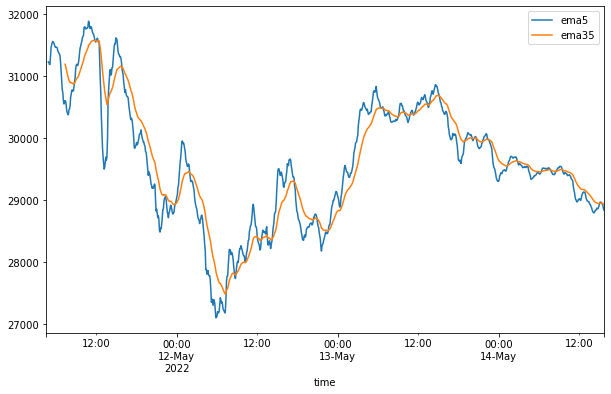

In [9]:
df.plot(y=['ema5', 'ema35'], figsize=(10,6))

In [10]:
def signal_gen(fast, slow, safemargin):
    if abs(fast - slow) > safemargin:
        if fast > slow:
            return True
        else:
            return False
    else:
        return None

In [11]:
df['signal'] = df.apply(lambda x: signal_gen(x['ema5'], x['ema35'], 25), axis=1)

In [13]:
df.loc[df['signal'].isnull()]

,open,high,low,close,volume,ema5,ema35,signal
time,,,,,,,,
2022-05-11 04:30:00,31348.55,31370.93,31301.09,31332.98,209.69427,NaN,NaN,None
2022-05-11 04:35:00,31332.98,31382.83,31250.00,31289.57,253.57183,NaN,NaN,None
2022-05-11 04:40:00,31289.57,31318.24,31161.61,31177.61,192.69935,NaN,NaN,None
2022-05-11 04:45:00,31177.61,31219.61,31049.25,31100.07,480.16016,NaN,NaN,None
2022-05-11 04:50:00,31100.07,31288.91,31095.66,31269.21,400.57973,31233.888000,NaN,None
...,...,...,...,...,...,...,...,...
2022-05-14 15:10:00,29026.84,29098.08,28980.24,29021.16,139.58569,28974.562795,28958.173851,None
2022-05-14 15:15:00,29021.16,29045.20,28964.04,28967.63,116.89095,28972.251863,28958.699193,None
2022-05-14 15:20:00,28967.62,28967.63,28932.92,28962.94,100.08524,28969.147909,28958.934793,None


In [14]:
df['signal'].fillna(method='ffill', inplace=True)

In [15]:
df.loc[df['signal'].isnull()]

,open,high,low,close,volume,ema5,ema35,signal
time,,,,,,,,
2022-05-11 04:30:00,31348.55,31370.93,31301.09,31332.98,209.69427,NaN,NaN,None
2022-05-11 04:35:00,31332.98,31382.83,31250.00,31289.57,253.57183,NaN,NaN,None
2022-05-11 04:40:00,31289.57,31318.24,31161.61,31177.61,192.69935,NaN,NaN,None
2022-05-11 04:45:00,31177.61,31219.61,31049.25,31100.07,480.16016,NaN,NaN,None
2022-05-11 04:50:00,31100.07,31288.91,31095.66,31269.21,400.57973,31233.888000,NaN,None
2022-05-11 04:55:00,31269.20,31304.59,31169.04,31218.02,397.15056,31228.598667,NaN,None
2022-05-11 05:00:00,31218.01,31225.52,31111.12,31118.13,545.53362,31191.775778,NaN,None
2022-05-11 05:05:00,31118.12,31205.83,31077.32,31201.14,295.26324,31194.897185,NaN,None
2022-05-11 05:10:00,31201.14,31888.85,31138.12,31604.98,1640.05447,31331.591457,NaN,None


In [16]:
df.head()

,open,high,low,close,volume,ema5,ema35,signal
time,,,,,,,,
2022-05-11 04:30:00,31348.55,31370.93,31301.09,31332.98,209.69427,NaN,NaN,None
2022-05-11 04:35:00,31332.98,31382.83,31250.00,31289.57,253.57183,NaN,NaN,None
2022-05-11 04:40:00,31289.57,31318.24,31161.61,31177.61,192.69935,NaN,NaN,None
2022-05-11 04:45:00,31177.61,31219.61,31049.25,31100.07,480.16016,NaN,NaN,None
2022-05-11 04:50:00,31100.07,31288.91,31095.66,31269.21,400.57973,31233.888,NaN,None


In [17]:
df['raw_signal'] = df.apply(lambda x: signal_gen(x['ema5'], x['ema35'], 25), axis=1)

In [26]:
df.loc[df['raw_signal'].isnull(), 'check'] = df['ema5']

<AxesSubplot:xlabel='time'>

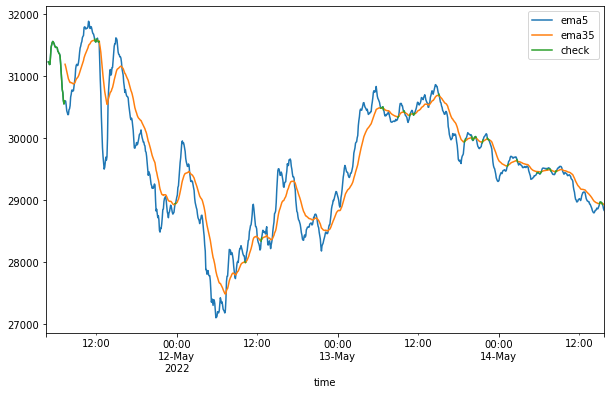

In [27]:
df.plot(y=['ema5', 'ema35', 'check'], figsize=(10,6))

In [28]:
df = df.loc[df['signal'].notnull()]

In [29]:
df

,open,high,low,close,volume,ema5,ema35,signal,raw_signal,check
time,,,,,,,,,,
2022-05-11 07:20:00,30711.69,30712.43,30530.14,30584.10,661.35454,30599.892529,31195.683143,False,False,NaN
2022-05-11 07:25:00,30584.11,30675.53,30524.78,30609.74,762.66450,30603.175019,31163.130746,False,False,NaN
2022-05-11 07:30:00,30609.75,30609.75,30403.80,30403.82,819.85868,30536.723346,31120.946816,False,False,NaN
2022-05-11 07:35:00,30403.82,30471.84,30200.00,30263.67,1400.80036,30445.705564,31073.320326,False,False,NaN
2022-05-11 07:40:00,30263.67,30538.92,30245.59,30361.48,1046.39709,30417.630376,31033.773641,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-05-14 15:25:00,28962.94,28991.48,28924.52,28930.29,94.61081,28956.195273,28957.343416,False,None,28956.195273
2022-05-14 15:30:00,28930.29,28948.24,28848.33,28904.17,130.01154,28938.853515,28954.389337,False,None,28938.853515
2022-05-14 15:35:00,28904.17,28904.18,28855.23,28863.49,140.14321,28913.732343,28949.339374,False,False,NaN


In [30]:
df.head()

,open,high,low,close,volume,ema5,ema35,signal,raw_signal,check
time,,,,,,,,,,
2022-05-11 07:20:00,30711.69,30712.43,30530.14,30584.10,661.35454,30599.892529,31195.683143,False,False,NaN
2022-05-11 07:25:00,30584.11,30675.53,30524.78,30609.74,762.66450,30603.175019,31163.130746,False,False,NaN
2022-05-11 07:30:00,30609.75,30609.75,30403.80,30403.82,819.85868,30536.723346,31120.946816,False,False,NaN
2022-05-11 07:35:00,30403.82,30471.84,30200.00,30263.67,1400.80036,30445.705564,31073.320326,False,False,NaN
2022-05-11 07:40:00,30263.67,30538.92,30245.59,30361.48,1046.39709,30417.630376,31033.773641,False,False,NaN


In [31]:
my_signal = df.ta.tsignals(df.signal, asbool=True, append=True, trade_offset=1)

c:\Users\gunsr\anaconda3\envs\investing\lib\site-packages\pandas_ta\core.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = result.iloc[:, i]


In [37]:
pf = vbt.Portfolio.from_signals(df.close,
                                entries=my_signal.TS_Entries,
                                exits=my_signal.TS_Exits,
                                freq='5 min',
                                direction="both")

In [38]:
pf.plot().show()

In [39]:
pf.stats()

Start                               2022-05-11 07:20:00
End                                 2022-05-14 15:45:00
Period                                  3 days 08:30:00
Start Value                                       100.0
End Value                                     98.250743
Total Return [%]                              -1.749257
Benchmark Return [%]                          -5.864583
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                               9.907448
Max Drawdown Duration                   2 days 09:55:00
Total Trades                                         34
Total Closed Trades                                  33
Total Open Trades                                     1
Open Trade PnL                                 2.034288
Win Rate [%]                                   30.30303
Best Trade [%]                                 5.902457
Worst Trade [%]                               -3

## Kelly % = W/A - (1 - W)/B

W = the win probability

B = the profit in the event of a

A = the potential loss

In [41]:
W = 0.3030 # Win Rate [%]
B = 2.0586 # Avg Winning Trade [%]
A = 1.0357 # Avg Losing Trade [%]

(W/A) - ((1 - W) / B)

-0.04602385782579871